# Global Impact - Segurança alimentar
## Seleção de linhagem de tomates

### Nomes:
- Gabriel Henrique
- Pedro Dib
- Antonio Sassine

### Importação e heatmap dos dados

Antes de qualquer coisa, precisamos importar o dataset com os dados dos tomates e mostrar o heatmap para achar as variáveis que têm alta corelação com a classe do tomate

<AxesSubplot:>

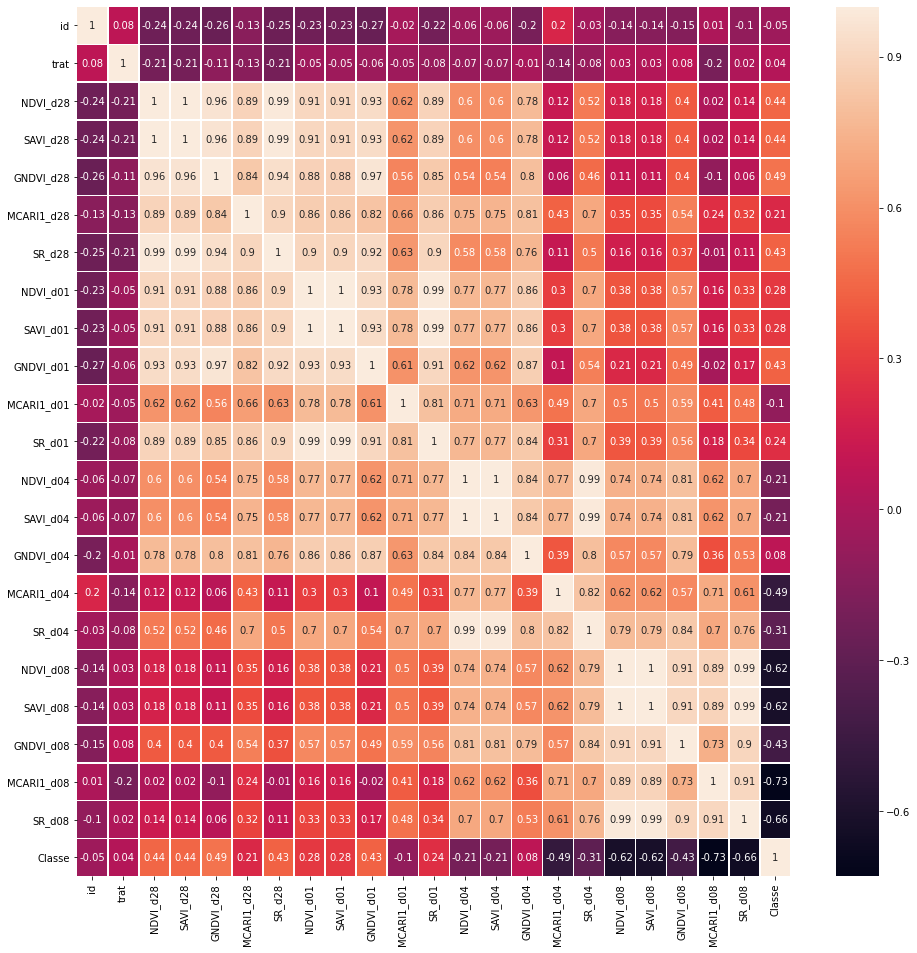

In [236]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Importa o dataset
df = pd.read_csv('dataset_tomate.csv')

# Matrix de correlação, ajuda á interpretar os dados e escolher
# as colunas com mais infuência na classificação
correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(16,16))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

A partir do heatmap acima, é possível dizer que algumas colunas têm alta correlação com a classe, então usando um threshold de x < -0.45 e x > 0.45, foi escolhido as seguintes colunas:

- GNDVI_d28:	0.49
- MCARI1_d01: 	-0.49
- NDVI_d04:		-0.62
- SAVI_d04:		-0.62
- MCARI1_d04:	-0.73
- SR_d04:		-0.66

In [237]:
# Selecionamos as colunas citadas como X e a Classe como Y
df_f = df.set_index('id')
X = df_f[['GNDVI_d28', 'MCARI1_d01','NDVI_d04', 'SAVI_d04', 'MCARI1_d04', 'SR_d04']]
Y = df_f['Classe']

Agora, precisamos separar uma parte do dataset para o treino do modelo preditivo e uma parte para os testes, mas antes precisamos normalizar as variáveis para valores entre 0 e 1.

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
print(f"Tamanho do treino: {train_X.shape[0]} samples")
print(f"Tamanho do teste: {test_X.shape[0]} samples")

Tamanho do treino: 105 samples
Tamanho do teste: 27 samples


Agora, para a criação do modelo, usamos o algoritmo linear `LogisticRegression`, pois suporta classificação binária e tem uma melhor performance.

In [239]:
# Criação do modelo
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(train_X, train_Y)

# Predição dos dados teste
predictions = model.predict(test_X)

Finalmente, os resultados dos testes, para cada tomate teste é mostrado a classificação predita e a classificação correta

In [240]:
import numpy as np

for i in range(len(predictions)):
	pred_res = predictions[i] == 1
	real_res = test_Y.values[i] == 1
	tom_id = test_Y.keys()[i]

	print(f"Tomate id n° {tom_id} classificado como:")
	print(f"{'Resistente contra fungos' if pred_res else 'Não resistente contra fungos'}")
	print(f"Classificação correta é:")
	print(f"{'Resistente contra fungos' if real_res else 'Não resistente contra fungos'}")
	print("")

Tomate id n° 21 classificado como:
Resistente contra fungos
Classificação correta é:
Resistente contra fungos

Tomate id n° 121 classificado como:
Resistente contra fungos
Classificação correta é:
Não resistente contra fungos

Tomate id n° 80 classificado como:
Resistente contra fungos
Classificação correta é:
Resistente contra fungos

Tomate id n° 30 classificado como:
Resistente contra fungos
Classificação correta é:
Não resistente contra fungos

Tomate id n° 15 classificado como:
Resistente contra fungos
Classificação correta é:
Resistente contra fungos

Tomate id n° 94 classificado como:
Não resistente contra fungos
Classificação correta é:
Não resistente contra fungos

Tomate id n° 6 classificado como:
Resistente contra fungos
Classificação correta é:
Resistente contra fungos

Tomate id n° 91 classificado como:
Não resistente contra fungos
Classificação correta é:
Não resistente contra fungos

Tomate id n° 101 classificado como:
Não resistente contra fungos
Classificação correta é

Por último, mostramos os dados estatísticos da performance do modelo, tal como o número de erros/acertos e a acurácia/erro

In [241]:
from sklearn.metrics import confusion_matrix, accuracy_score

TN, FP, FN, TP = confusion_matrix(test_Y, predictions).ravel()

print('Verdadeiro Positivos(TP)  = ', TP)
print('Falso Positivos(FP) = ', FP)
print('Verdadeiro Negativos(TN)  = ', TN)
print('Falso Negativos(FN) = ', FN)

print(f'Acurária: {(accuracy_score(test_Y, predictions) * 100.0):.0f} %')


Verdadeiro Positivos(TP)  =  17
Falso Positivos(FP) =  6
Verdadeiro Negativos(TN)  =  4
Falso Negativos(FN) =  0
Acurária: 78 %
